# Week 2 Part 2 - Network Analysis: Centrality Measures
### The p < 0.05 Team - Haig Bedros, Noori Selina, Julia Ferris, Matthew Roland

# Loading the data & EDA

For this project, we will examine the connections among users in a dataset regarding whether or not users purchased an item. The data comes from the Social Network Ads Dataset on Kaggle at the following website: https://www.kaggle.com/datasets/rakeshrau/social-network-ads/data.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/hbedros/centrality-measures/main/data/Social_Network_Ads.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000

This section checks the data types. It appears the data has the same type of data across each respective column, so there is no need for data normalization.

In [ ]:
# Get basic information about the dataset
print(data.info())

This section checks for any missing values. It appears the data does not contain any missing values.

In [ ]:
# Check for any missing values
print(data.isnull().sum())

In the table below, the summary statistics are clearly shown. These statistics are used to detect trends in the data and show the structure of different variables.

In [ ]:
# Summary statistics of the dataset
print(data.describe())

Since one of the factors analyzed in this assignment is age, the range is below.

In [ ]:
# Age range
print(f"Age ranges from {data['Age'].min()} to {data['Age'].max()} years")

### Interpretation of the Data Overview

#### Data Sample
- **Columns**: User ID, Gender, Age, Estimated Salary, Purchased.

#### Data Information
- **Entries**: 400 users.
- **No Missing Values**: All columns have 400 entries.
- **Data Types**: Mostly integers, Gender is a string.

#### Summary Statistics
- **Age**: 18 to 60 years.
- **Estimated Salary**: 15,000 to 150,000.
- **Purchased**: 0 (not purchased) or 1 (purchased).
- **Percentiles**:
  - 25% of users are 30 or younger, earn 43,000 or less.
  - 50% of users are 37 or younger, earn 70,000 or less.
  - 75% of users are 46 or younger, earn 88,000 or less.

# Creating a Nodal Network

Now, we will partition our data into nodes and edges in order to determine the degree of connectivity among users based on their ages. We will also examine differences based on gender later in this analysis.

In [ ]:
# Create a graph from the data
g = nx.Graph()

# We add nodes (users) with attributes (gender, age, salary, purchased)
for index, row in data.iterrows():
    g.add_node(row['User ID'], gender=row['Gender'], age=row['Age'], salary=row['EstimatedSalary'], purchased=row['Purchased'])

# We add edges (connections) between users if they have the same age
# This is hypothetical connection
for i, node1 in enumerate(g.nodes(data=True)):
    for j, node2 in enumerate(g.nodes(data=True)):
        if i != j and node1[1]['age'] == node2[1]['age']:
            g.add_edge(node1[0], node2[0])

# Calculating Degree and Eigenvector Centrality

Next, we will calculate the degree and eigenvector centrality among nodes in order to determine the number of connections each user has (degree centrality), as well as the influence of nodes within this network (eigenvector centrality).

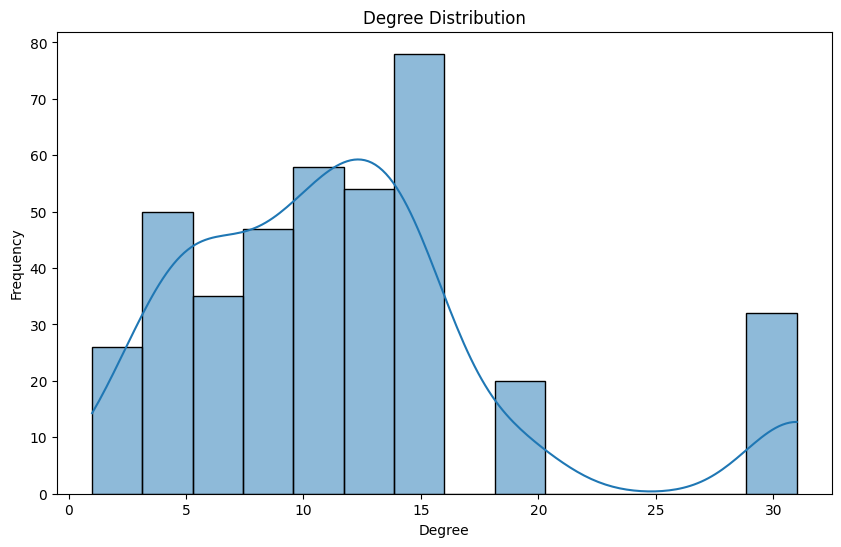

In [2]:
# Degree centrality (number of connections each user has)
degree_centrality = nx.degree_centrality(g)

# Eigenvector centrality (importance of each user based on connections)
eigenvector_centrality = nx.eigenvector_centrality(g)

# Adding centrality measures to the dataset
data['degree_centrality'] = data['User ID'].map(degree_centrality)
data['eigenvector_centrality'] = data['User ID'].map(eigenvector_centrality)

# Plotting the degree distribution (how many connections users have)
degrees = [val for (node, val) in g.degree()]
plt.figure(figsize=(10, 6))
sns.histplot(degrees, kde=True)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

### Interpretation of the Degree Distribution Graph

- **Most Connections**: Most users have around 15 connections.
- **Peaks**: There are peaks at 5, 10, 15, and 30 connections.
- **Range**: Users have between 0 to 31 connections.
- **Gap**: Few users have between 20 to 25 connections.

This graph shows how many connections users typically have in the network.

In [3]:
# The top users by degree centrality (most connected users)
top_users = data.nlargest(10, 'degree_centrality')
print("Top 10 Users by Degree Centrality:")
print(top_users[['User ID', 'degree_centrality']])

bottom_users = data.nsmallest(10, 'degree_centrality')
print("\n Bottom 10 Users by Degree Centrality:")
print(bottom_users[['User ID', 'degree_centrality']])

# Minimum, Average, and Range of Degree
min_degree = min(degrees)
avg_degree = sum(degrees) / len(degrees)
max_degree = max(degrees)

print(f"Minimum Degree: {min_degree}")
print(f"Average Degree: {avg_degree:.2f}")
print(f"Maximum Degree: {max_degree}")
print(f"Degree Range: {max_degree - min_degree}")

Top 10 Users by Degree Centrality:
     User ID  degree_centrality
1   15810944           0.077694
9   15727311           0.077694
35  15713144           0.077694
42  15772798           0.077694
53  15671655           0.077694
83  15711218           0.077694
89  15682268           0.077694
95  15709441           0.077694
96  15710257           0.077694
98  15575694           0.077694
Minimum Degree: 1
Average Degree: 11.76
Maximum Degree: 31
Degree Range: 30


### Interpretation of the Top and Bottom Users by Degree Centrality

- **Top 10 Users by Degree Centrality**: The top 10 users listed all have the same degree centrality value of 0.077694.
  - This means these users have the highest number of connections in the network.

- **Bottom 10 Users by Degree Centrality**: The bottom 10 users listed have degree centrality values ranging from 0.0025 to 0.005
  - These users have the fewest number of connections in the network

#### Degree Statistics
- **Minimum Degree**: 1
  - The user with the fewest connections has 1 connection.
- **Average Degree**: 11.76
  - On average, each user has about 12 connections.
- **Maximum Degree**: 31
  - The user with the most connections has 31 connections.
- **Degree Range**: 30
  - The difference between the maximum and minimum number of connections is 30.

This summary helps us understand the connectivity of users in the network, highlighting the most connected users and providing an overview of how connected users are on average.

In [ ]:
top_users_eigen = data.nlargest(10, 'eigenvector_centrality')
print("Top 10 Users by Eigenvector Centrality:")
print(top_users_eigen[['User ID', 'eigenvector_centrality']])

bottom_users_eigen = data.nsmallest(10, 'eigenvector_centrality')
print("\n Bottom 10 Users by Eigenvector Centrality:")
print(bottom_users_eigen[['User ID', 'eigenvector_centrality']])

### Interpretations of Eigenvector Centrality

- **Top 10 Users by Eigenvector Centrality**: The top 10 users listed all have the highest eigenvector centrality values.
  - This means these users are the most influential nodes in the network due to their high connectivity with other highly connected nodes.

- **Bottom 10 Users by Eigenvector Centrality**: The bottom 10 users listed have the lowest eigenvector centrality values.
  - These users are the least influential in the network due

## Visualizations

Now, we will create network graphs to illustrate the connections among each node based on their ages. In addition to this, we will view differences among nodal connections and centrality by gender. Specifically, red nodes will represent female IDs, whereas blue nodes will represent male IDs.

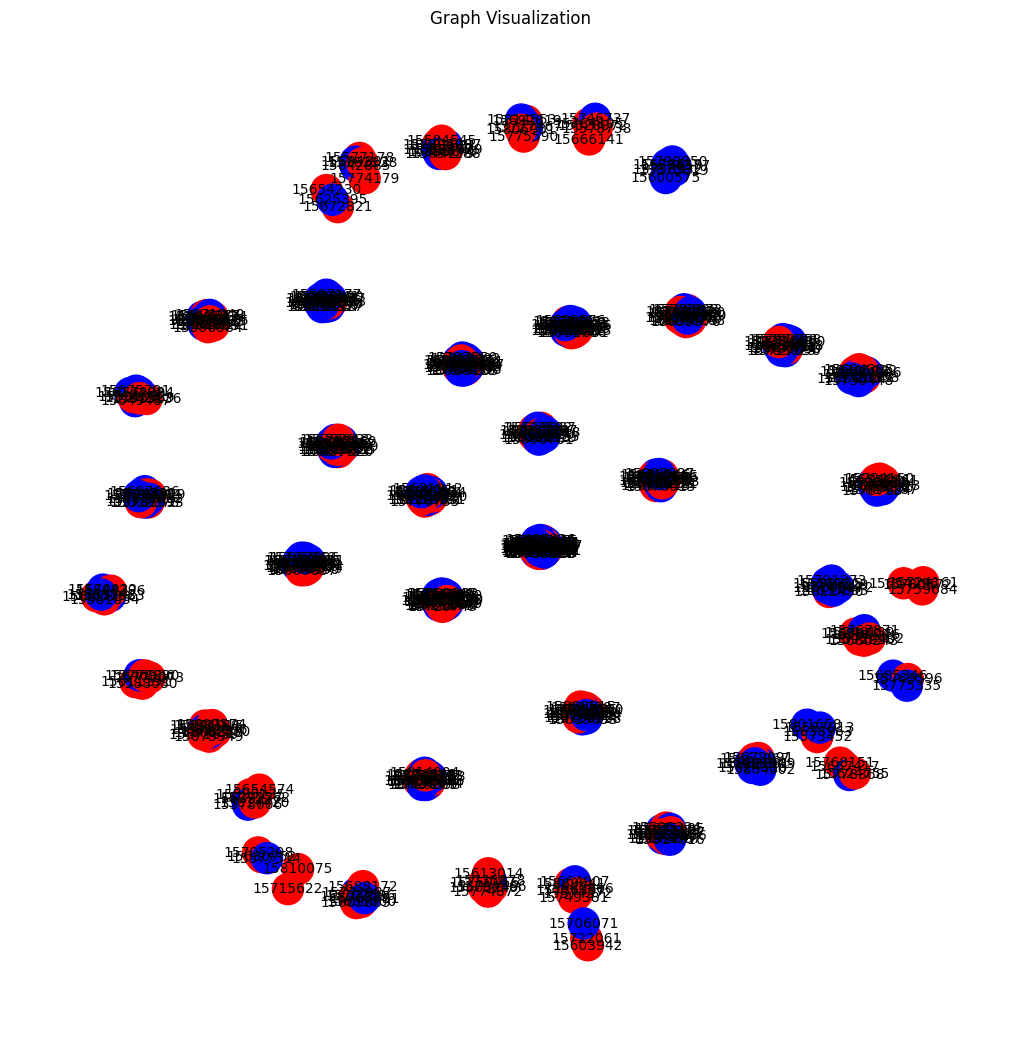

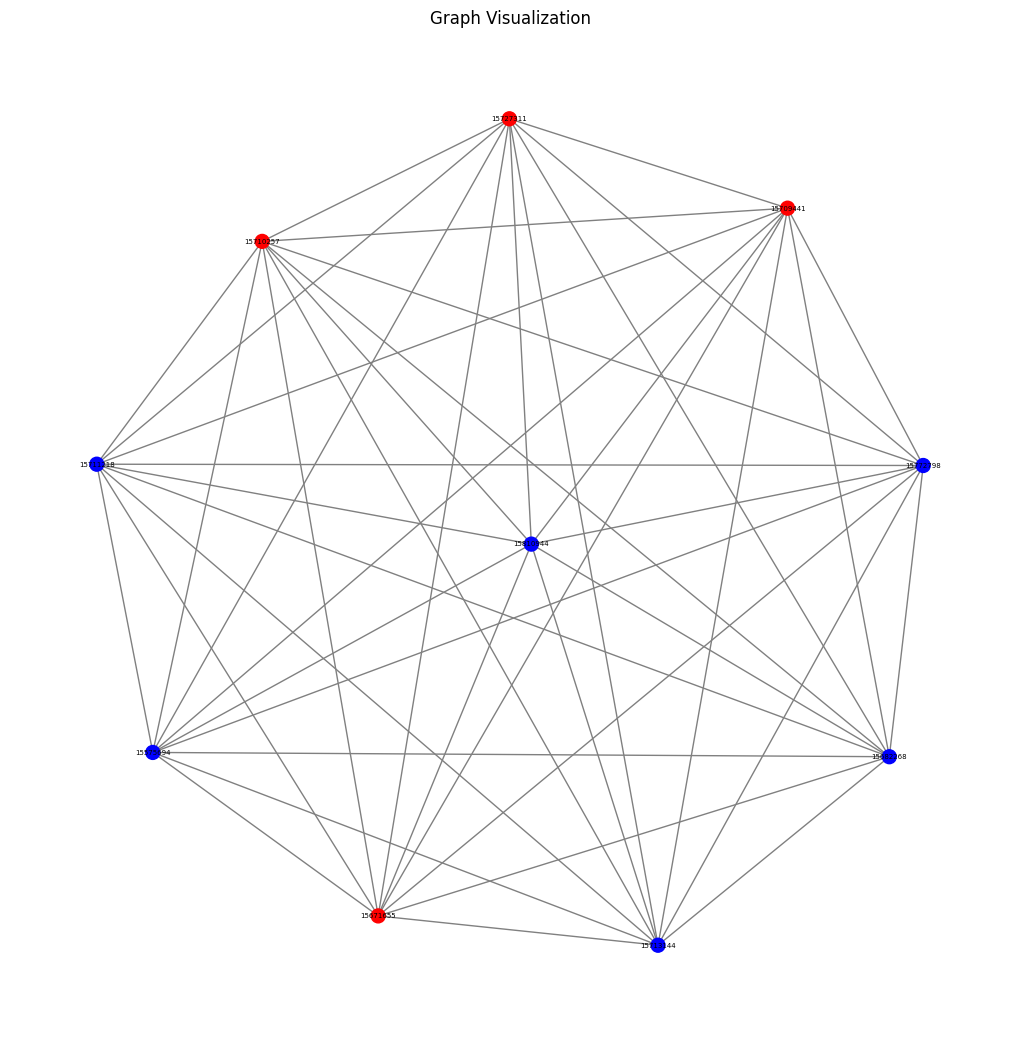

In [4]:
color_map = {'Male': 'blue', 'Female': 'red'}

colors = [color_map[g.nodes[node]['gender']] for node in g.nodes]

plt.figure(figsize= (10,10))
nx.draw(g, node_color = colors, with_labels = True, node_size=500, font_size=10, font_color='black', edge_color='gray')
plt.title('Graph Visualization')
plt.show()

# Visualization

Based on the visualizations above, we can see that there are several emergent clusters based on earned salary; gender (blue represents Male, red represents Female) does not appear to be a contributing factor to the emergence of these clusters. This is further established based on the visualization of the top ten central figures. As we can see, they are all highly connected within their cluster, but gender is not a dividing factor.

In [5]:
from scipy import stats

# Creating groups based on Gender for a t-test
Male_ID = data[data['Gender'] == 'Male']['degree_centrality']
Female_ID = data[data['Gender'] == 'Female']['degree_centrality']

t_val, p_val = stats.ttest_ind(Male_ID, Female_ID)

print(f"t = {round(t_val, 4)}")
print(f"p = {round(p_val, 2)}")


t = 1.8735
p = 0.06


# T-Test Results

Based on an independent two samples t-test, we can see that the influence of gender is non-significant (though converging on significance) in terms of determining differences in degree centrality among nodes, indicating that other factors, such as age or education, are likely better predictors regarding the relative prominence of nodal connections within clusters.

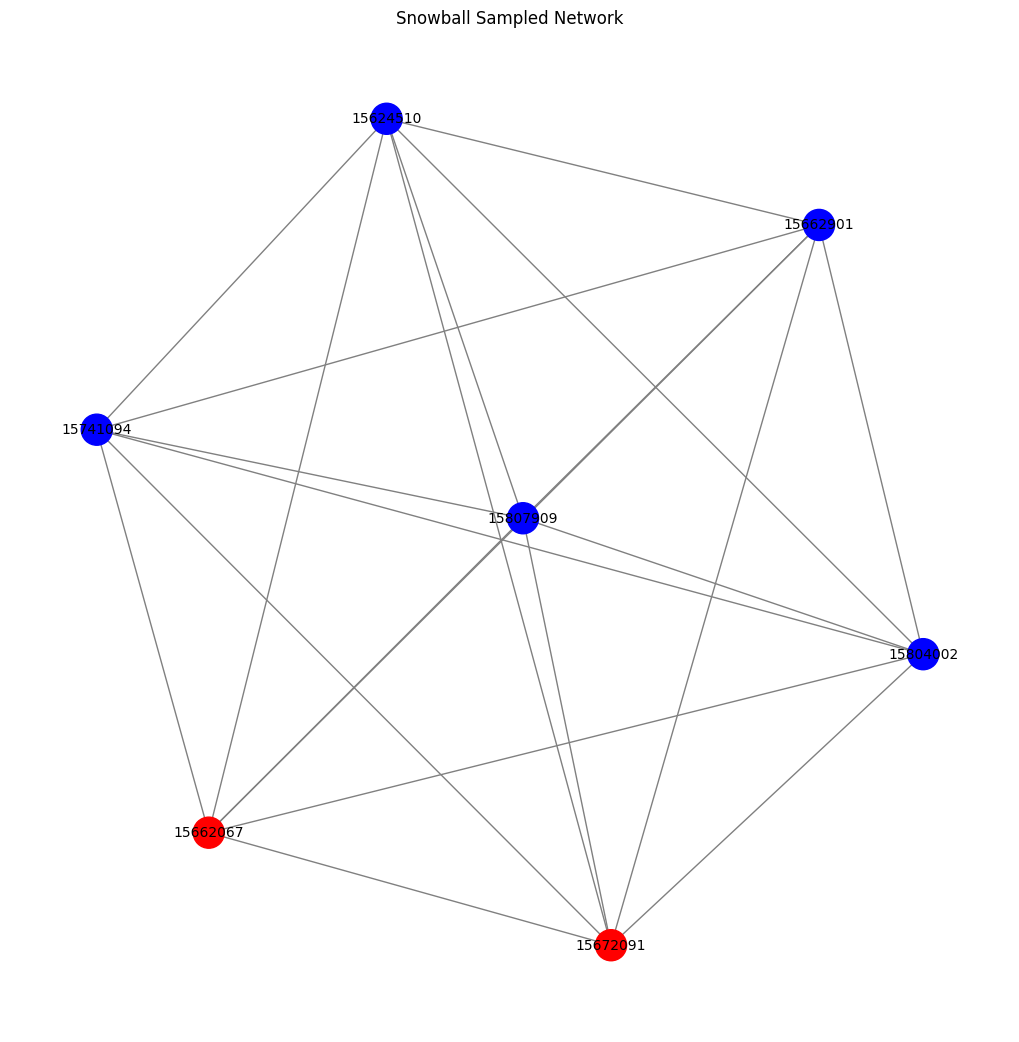

In [6]:
# Snowball Sampling Function

def snowball_sampling(g, start_node, depth):
    """
    Perform snowball sampling on the graph G starting from start_node up to a given depth.
    """
    layers = {start_node: 0}
    visited = set([start_node])
    current_layer = [start_node]

    for d in range(1, depth + 1):
        next_layer = []
        for node in current_layer:
            neighbors = set(g.neighbors(node)) - visited
            next_layer.extend(neighbors)
            visited.update(neighbors)
        layers.update({n: d for n in next_layer})
        current_layer = next_layer

    sampled_nodes = [node for node, layer in layers.items() if layer <= depth]
    return g.subgraph(sampled_nodes)

# Apply snowball sampling with a start node and depth
start_node = data.iloc[0]['User ID']  # Example start node (first user in the dataset)
depth = 2  # Define the depth of sampling
sampled_graph = snowball_sampling(g, start_node, depth)

# Visualization of the Snowball Sampled Network
color_map = {'Male': 'blue', 'Female': 'red'}
colors_sub = [color_map[sampled_graph.nodes[node]['gender']] for node in sampled_graph.nodes]

plt.figure(figsize=(10, 10))
nx.draw(sampled_graph, with_labels=True, node_size=500, node_color=colors_sub, font_size=10, font_color='black', edge_color='gray')
plt.title('Snowball Sampled Network')
plt.show()


# Snowball Sampling

After performing snowball sampling, the visualization revealed a highly interconnected subgraph with nodes color-coded by gender (blue for Male, red for Female). This dense network highlights key users and their immediate connections. This subset is relevant as it isolates influential nodes, helping us understand their impact on purchasing behavior and develop targeted marketing strategies within their social circles.